## Autores:
Wilder Ramírez

Sebastián Deantonio

*Métodos Estadísticos*

*Maestría en Analítica de Datos*

# Definición Actividad
***
## ***Base de gorriones***
> Tomado de  Bumpus, H.C., *Biological Lectures*, Marine Biology Laboratory, Woods Hole, MA, 1898.

La base para este ejercicio se encuentra alojada en el [GitHub del curso (birds.csv).](https://github.com/Izainea/ucmadmetodosestadisticos/blob/master/Bases/birds.csv)

## ***Ejercicios***

1. Haga un análisis de componentes principales con la matriz de correlaciones.

2. Compruebe que la suma de valores propios de la matriz de correlaciones es igual a la suma de los elementos de la diagonal *(traza)*.

3. De acuerdo a los coeficientes que definen a la primera y segunda componente se dice que la primera indica el tamaño de los pajaros y la segunda la forma. Explique.

4. Dibuje el plano factorial (e plano de las dos primeras componentes) y resalte los primeros 21 datos en el gráfico (use otro color para graficarlos, póngales una etiqueta, dibujelos de forma separada,...), si se sabe que sobrevivieron los primeros 21 registros ¿Tiene alguna observación al respecto?

5. Haga un biplot de este ejercicio.

7. ¿Cuantas componentes recomienda retener si requiero al menos el 90% de variabilidad total?

7. Haga ahora un análisis de componentes con la matriz de covarianzas. 

8. ¿Cómo se ha afectado la escala respecto al ejercicio con correlaciones?

9. Compare la proporcion acumulada de porcentaje de variabilidad y explique la diferencia.

## ***Actividades Preliminares***

1.  Importación de librerías
***

In [243]:
from pydoc import help 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

2.  Carga de datos
***

In [244]:
df="https://raw.githubusercontent.com/Izainea/ucmadmetodosestadisticos/master/Bases/birds.csv"
data=pd.read_csv(df, sep=",", decimal=".", encoding='ISO-8859-1', engine='c', quoting=3, low_memory=False)
data = data[['Longitud Total','Extensión de las alas','Longitud pico y cabeza','Longitud del húmero','Longitud de la quilla']]

3.  Limpieza de datos
***

In [245]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitud Total          49 non-null     int64  
 1   Extensión de las alas   49 non-null     int64  
 2   Longitud pico y cabeza  49 non-null     float64
 3   Longitud del húmero     49 non-null     float64
 4   Longitud de la quilla   49 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.0 KB


,Longitud Total,Extensión de las alas,Longitud pico y cabeza,Longitud del húmero,Longitud de la quilla
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,157.979592,241.326531,31.459184,18.469388,20.826531
std,3.654277,5.067822,0.794753,0.564286,0.991374
min,152.000000,230.000000,30.100000,17.200000,18.600000
25%,155.000000,238.000000,30.900000,18.100000,20.200000
50%,158.000000,242.000000,31.500000,18.500000,20.700000
75%,161.000000,245.000000,32.000000,18.800000,21.500000
max,165.000000,252.000000,33.400000,19.800000,23.100000


In [246]:
data.columns

Index(['Longitud Total', 'Extensión de las alas', 'Longitud pico y cabeza',
       'Longitud del húmero', 'Longitud de la quilla'],
      dtype='object')

In [247]:
data.head()

,Longitud Total,Extensión de las alas,Longitud pico y cabeza,Longitud del húmero,Longitud de la quilla
0,156,245,31.6,18.5,20.5
1,154,240,30.4,17.9,19.6
2,153,240,31.0,18.4,20.6
3,153,236,30.9,17.7,20.2
4,155,243,31.5,18.6,20.3


4. Análisis descriptivo
***

## ***Desarrollo***

1. Haga un análisis de componentes principales con la matriz de correlaciones.
***

In [248]:
correlacion = data.corr()

Mapa de correlaciones:

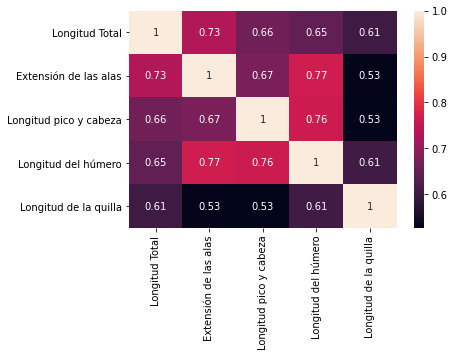

In [249]:
sns.heatmap(correlacion, annot=True)
plt.show()

Escalamiento de datos

In [250]:
escala=StandardScaler()
escala.fit(data)
CuantiScale=escala.transform(data)
print('Dimensión data escalada:',CuantiScale.shape)

Dimensión data escalada: (49, 5)


### Construcción de PCA

Creamos un objeto PCA

In [251]:
pca=PCA(n_components=2)
pca.fit(CuantiScale)
cuanti_pca=pca.transform(CuantiScale)
print("Ajuste de PCA", CuantiScale.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('Variabilidad del:',sum(expl[0:6])*100,'%')

Ajuste de PCA (49, 5)
[0.72319567 0.10630082]
Variabilidad del: 82.94964842365756 %


[0.72319567 0.10630082]


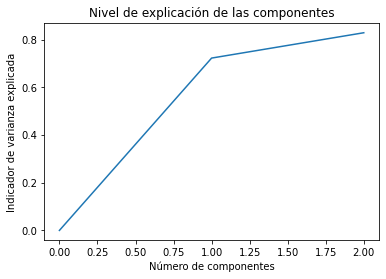

In [252]:
print(pca.explained_variance_ratio_)
pca_cor=pca.explained_variance_ratio_
a=len(pca.components_)+1
y=range(1,a)
plt.plot(range(len(pca.components_)+1), np.concatenate((np.array([0]),np.cumsum(pca.explained_variance_ratio_))))
plt.xlabel('Número de componentes')
plt.ylabel('Indicador de varianza explicada')
plt.title('Nivel de explicación de las componentes')
plt.show()

In [253]:
cp = np.linalg.eig(correlacion)
cp

(array([3.61597834, 0.16452751, 0.30156552, 0.38642455, 0.53150408]),
 array([[-0.45179893, -0.3739091 ,  0.42041399, -0.69047023,  0.05072137],
        [-0.46168085,  0.53008046, -0.54786307, -0.34054844, -0.29956355],
        [-0.45054161,  0.34279226,  0.60629605,  0.45449265, -0.32457242],
        [-0.47073887, -0.65166652, -0.38827811,  0.410935  , -0.18468403],
        [-0.39767537,  0.19243414, -0.06887199,  0.1784558 ,  0.87648935]]))

2. Compruebe que la suma de valores propios de la matriz de correlaciones es igual a la suma de los elementos de la diagonal (traza).
***

In [254]:
ValP = np.linalg.eig(correlacion.values)[0]
total = np.cumsum(ValP)
total[-1]

5.000000000000002

In [255]:
suma_elementos_diagonal = len(cp[0])
suma_elementos_diagonal

5

3. De acuerdo a los coeficientes que definen a la primera y segunda componente se dice que la primera indica el tamaño de los pajaros y la segunda la forma. Explique.
***

In [256]:
s = np.cov(CuantiScale.T)
autovalores, vectores = np.linalg.eig(s)                                                                                    

In [257]:
coeficientes = []

for i in range(0,2):
    for j in range(0,5):
        vap = autovalores[i]
        cor = s[i,i]
        vep = vectores[j,i]
        coef = vep * np.sqrt(vap) / np.sqrt(cor)
        coeficientes.append(coef)
        
print('Correlación entre las variables y las primeras dos componentes: ', '\n', '\n',tabulate(np.array(coeficientes).reshape(5,2), headers=["Variables","PCA1", "PCA2"], 
               showindex=['Longitud Total','Extensión de las alas','Longitud pico-cabeza','Longitud del humero','Longitud de quilla'], tablefmt='fancy_grid'))        

Correlación entre las variables y las primeras dos componentes:  
 
 ╒═══════════════════════╤═══════════╤════════════╕
│ Variables             │      PCA1 │       PCA2 │
╞═══════════════════════╪═══════════╪════════════╡
│ Longitud Total        │ -0.859128 │ -0.87792   │
├───────────────────────┼───────────┼────────────┤
│ Extensión de las alas │ -0.856738 │ -0.895144  │
├───────────────────────┼───────────┼────────────┤
│ Longitud pico-cabeza  │ -0.756209 │ -0.151665  │
├───────────────────────┼───────────┼────────────┤
│ Longitud del humero   │  0.215011 │  0.139043  │
├───────────────────────┼───────────┼────────────┤
│ Longitud de quilla    │ -0.264329 │  0.0780551 │
╘═══════════════════════╧═══════════╧════════════╛


4. Dibuje el plano factorial (e plano de las dos primeras componentes) y resalte los primeros 21 datos en el gráfico (use otro color para graficarlos, póngales una etiqueta, dibujelos de forma separada,...), si se sabe que sobrevivieron los primeros 21 registros ¿Tiene alguna observación al respecto?
***

In [258]:
Pca_Tra=pd.DataFrame(cuanti_pca, index=data.index, columns=['PC1','PC2'])

In [259]:
p21 = Pca_Tra[:21]

In [280]:
import plotly.graph_objects as go
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=Pca_Tra['PC1'], y=Pca_Tra['PC2'],
                    mode='markers',
                    name='Total'))

fig.add_trace(go.Scatter(x=p21['PC1'], y=p21['PC2'],
                    mode='markers',
                    name='Sobrevivientes'))

fig.update_layout(title='Plano factorial de las 2 primeras componentes')

fig.show()

Se identifica que los primeros 21 registros se encuentran concetrados hacia el 0 en ambos ejes y con una dirección en el eje $X$ siendo la primera componente la determinante de su variabilidad. Lo que indica que la longitud del ave incide en su capacidad de sobrevivir, espcialmente por la longitud de la quilla y por el pico - cabeza

5. Haga un biplot de este ejercicio.
***

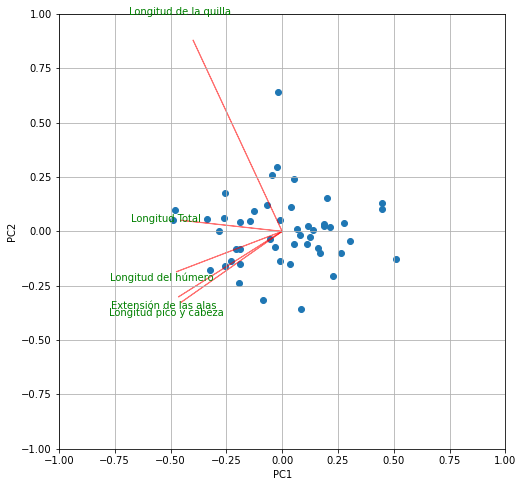

In [261]:
def biplot(score,coeff,pcax,pcay,labels=None):
    plt.figure(figsize=(8,8))
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=coeff.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[pca1,i], coeff[pca2,i],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[pca1,i]* 1.15, coeff[pca2,i] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[pca1,i]* 1.15, coeff[pca2,i] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

biplot(cuanti_pca,pca.components_,1,2,labels=data.columns)

6. ¿Cuantas componentes recomienda retener si requiero al menos el 90% de variabilidad total?
***

In [262]:
pca_90=PCA(n_components=.90)
pca_90.fit(CuantiScale)
cuanti_pca_90=pca.transform(CuantiScale)

In [263]:
print("Ajuste de PCA con variabilidad del 90%", CuantiScale.shape)
expl_90 = pca_90.explained_variance_ratio_
print(expl_90)
print('suma:',sum(expl_90[0:6]))

Ajuste de PCA con variabilidad del 90% (49, 5)
[0.72319567 0.10630082 0.07728491]
suma: 0.9067813940416762


Se requiere retener 3 componentes para tener al menos el 90% de variabilidad

7. Haga ahora un análisis de componentes con la matriz de covarianzas.
***

In [264]:
# Se realiza un arreglo matricial
x = data.loc[:,:].values

In [265]:
sobreviviente = []

for i in range(49):
    if i <= 20:
        sobreviviente.append("Si")
    else:
        sobreviviente.append("No")   

In [266]:
data21 = data
data21['Sobreviviente'] = sobreviviente
y = data21.loc[:,['Sobreviviente']].values

In [267]:
x2 = StandardScaler(with_std=False).fit_transform(x) 

In [268]:
features = ['Longitud Total', 'Extensión de las alas', 'Longitud pico y cabeza',
       'Longitud del húmero', 'Longitud de la quilla']

In [269]:
dftip1 = pd.DataFrame(data=x2, columns=[i+ " tip1" for i in features])

In [270]:
standardbase=pd.DataFrame(x2, columns=features)

In [271]:
COV=np.cov(np.transpose(x))
COV

array([[13.3537415 , 13.61096939,  1.92206633,  1.33061224,  2.19221939],
       [13.61096939, 25.68282313,  2.71360544,  2.19770408,  2.65782313],
       [ 1.92206633,  2.71360544,  0.63163265,  0.34226616,  0.41464711],
       [ 1.33061224,  2.19770408,  0.34226616,  0.31841837,  0.33937075],
       [ 2.19221939,  2.65782313,  0.41464711,  0.33937075,  0.98282313]])

In [272]:
np.linalg.eig(COV)

(array([35.32575695,  4.62245934,  0.63091779,  0.31278363,  0.07752107]),
 array([[ 0.53650052,  0.8280999 , -0.15649065,  0.04020969, -0.01765243],
        [ 0.82901535, -0.55051223, -0.05774395,  0.06902156,  0.03964203],
        [ 0.09649615,  0.03356237,  0.23751487, -0.89762653,  0.35695288],
        [ 0.07435219, -0.01459529,  0.20324541, -0.30724056, -0.9265815 ],
        [ 0.10030441,  0.09923405,  0.93512262,  0.30575979,  0.1102192 ]]))

In [273]:
# Calculo de componentes con covarianza

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [274]:
principalDf.corr()

,principal component 1,principal component 2
principal component 1,1.000000e+00,4.749529e-16
principal component 2,4.749529e-16,1.000000e+00


In [275]:
finalDf = pd.concat([principalDf, data[['Sobreviviente']]], axis = 1)

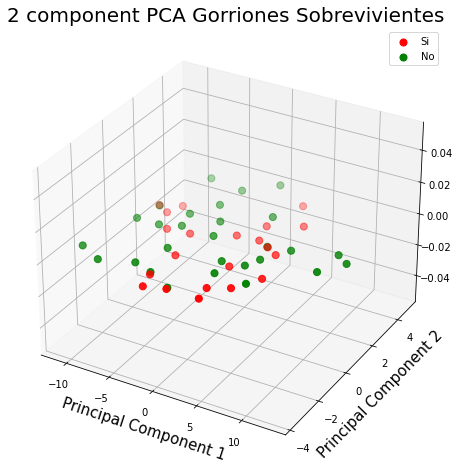

In [276]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA Gorriones Sobrevivientes', fontsize = 20)
targets = ['Si','No']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Sobreviviente'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
#                , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

8. ¿Cómo se ha afectado la escala respecto al ejercicio con correlaciones?
***

[0.86224654 0.11282701]


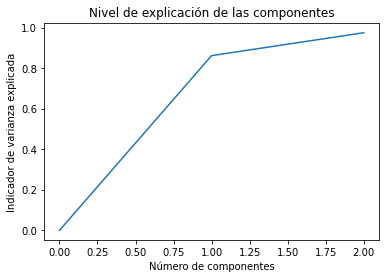

In [277]:
print(pca.explained_variance_ratio_)
a=len(pca.components_)+1
y=range(1,a)
plt.plot(range(len(pca.components_)+1), np.concatenate((np.array([0]),np.cumsum(pca.explained_variance_ratio_))))
plt.xlabel('Número de componentes')
plt.ylabel('Indicador de varianza explicada')
plt.title('Nivel de explicación de las componentes')
plt.show()

Se evidencia que comparado con el ACP de correlaciones y  la misma cantidad de componentes, el ejercicio escalado con la covarianza genera mayor variabilidad de datos.

9. Compare la proporcion acumulada de porcentaje de variabilidad y explique la diferencia.
***

In [278]:
pca.components_

array([[-0.53650052, -0.82901535, -0.09649615, -0.07435219, -0.10030441],
       [ 0.8280999 , -0.55051223,  0.03356237, -0.01459529,  0.09923405]])

PCA con covarianza:  [0.86224654 0.11282701] Total:  0.9750735544596049
PCA con correlación:  [0.72319567 0.10630082] Total:  0.8294964842365756


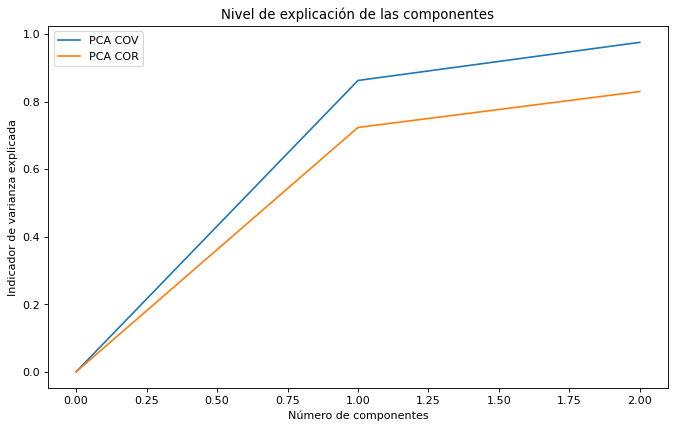

In [279]:
print('PCA con covarianza: ',pca.explained_variance_ratio_, 'Total: ', pca.explained_variance_ratio_.sum())
print('PCA con correlación: ', pca_cor, 'Total: ', pca_cor.sum())
plt.figure(figsize=(10, 6),dpi=80)
plt.plot(range(len(pca.components_)+1), np.concatenate((np.array([0]),np.cumsum(pca.explained_variance_ratio_))), label='PCA COV' )
plt.plot(range(len(pca_cor)+1), np.concatenate((np.array([0]),np.cumsum(pca_cor))), label='PCA COR' )
plt.xlabel('Número de componentes')
plt.ylabel('Indicador de varianza explicada')
plt.title('Nivel de explicación de las componentes')
plt.legend()

Dados los resultados de los ACP de covarianza y correlación se entiende que, con covarianza se alcanzan niveles más altos de variabilidad con las mismas componentes del ACP de correlación, esto debido a la no estandarización de los datos, ya que en correlación quedan estandarizados con media 0 y desviación estándar 1. Se podría usar cualquiera de los dos ACP describiendo previamente el conjunto de datos que se está analizando, para este ejercicio, dado que su escala original no cuenta con necesidad de tipificación, se podría usar el ACP con covarianza; sin embargo, para un ejercicio en el cual se tengan valores con escalas diferenciadas, podría considerar el uso del ACP con correlación.